### CNN does not perform good in case our images are rotated or that kind of transformed
### So data augmentation is used to produce multiple samples out of 1 sample using flip,rotation,contrast,zoom

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image library in python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir


'.\\datasets\\flower_photos'

In [5]:
#converting path to Windows path object

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
# going into all flower directories and showing all files with .jpg extension

list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

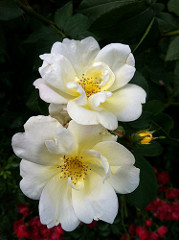

In [10]:
# show 1st rose image

PIL.Image.open(str(roses[0]))

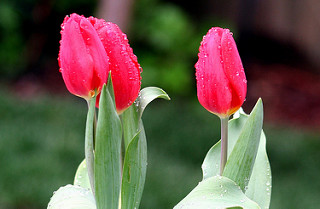

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


In [12]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))    
}

In [13]:
flowers_image_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [14]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4 
}

In [17]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [18]:
# storing in cv2 object
# oprn cv expects string path not windows path

img = cv2.imread(str(flowers_image_dict['roses'][0]))

In [19]:
# open cv read images and converted to 3d numpy array

img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [21]:
img.shape

# x,y,rgb channel

(240, 179, 3)

In [23]:
# resize all images to some standard size before training our model

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
#now starting our model preparation

X,y = [],[]

for flower_name,images in flowers_image_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [25]:
for flower_name,images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [35]:
X = np.array(X)
y = np.array(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [38]:
len(X_test)


918

In [39]:
len(X_train)

2752

In [46]:
# normalising or scaling our train and test samples

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [47]:
len(X_train_scaled)

2752

In [48]:
len(y_train)

2752

In [49]:
num_classes = 5  #5 types of flowers

model = Sequential([
    #16 filters of size 3 by 3
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    #32 filters of size 3 by 3
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    #64 filters of size 3 by 3
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    #now we have to flatten the 2d array to 1d as dense layers use 1d array
    layers.Flatten(),
    
    layers.Dense(128,activation="relu"),
    
    #final output layer having 5 neurons corresponding to 5 flowers
    layers.Dense(num_classes),        #by default linear activation
    
])


model.compile(optimizer = 'adam',loss =
tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs= 30)

Epoch 1/30
86/86 [==============================] - 44s 491ms/step - loss: 1.3081 - accuracy: 0.4259
Epoch 2/30
86/86 [==============================] - 57s 669ms/step - loss: 1.0058 - accuracy: 0.6025
Epoch 3/30
86/86 [==============================] - 66s 762ms/step - loss: 0.8309 - accuracy: 0.6846
Epoch 4/30
86/86 [==============================] - 49s 571ms/step - loss: 0.5758 - accuracy: 0.7889
Epoch 5/30
86/86 [==============================] - 50s 580ms/step - loss: 0.3705 - accuracy: 0.8699
Epoch 6/30
86/86 [==============================] - 59s 685ms/step - loss: 0.2063 - accuracy: 0.9346
Epoch 7/30
86/86 [==============================] - 48s 554ms/step - loss: 0.0877 - accuracy: 0.9731
Epoch 8/30
86/86 [==============================] - 47s 548ms/step - loss: 0.0568 - accuracy: 0.9855
Epoch 9/30
86/86 [==============================] - 46s 540ms/step - loss: 0.0553 - accuracy: 0.9847
Epoch 10/30
86/86 [==============================] - 48s 555ms/step - loss: 0.0476 - accura

In [50]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 140ms/step - loss: 2.3186 - accuracy: 0.6460


[2.318610668182373, 0.6459695100784302]

#### Above is ex of overfitting our epochs gave so much precision but only 65% when model.evaluate used

In [51]:
predictions = model.predict(X_test_scaled)
predictions

#linear values bcz by default linear activation was used

array([[  5.676886  ,  30.185644  ,   3.3460934 , -19.580635  ,
          1.4465358 ],
       [ 10.868605  ,   6.5923676 ,  -3.4613047 ,  -8.192764  ,
          7.461862  ],
       [  0.52351445,   2.456404  ,  13.935168  ,  -7.2222676 ,
          2.450923  ],
       ...,
       [  4.557539  ,  -6.8157096 ,  -4.293043  ,  10.49024   ,
         11.646853  ],
       [  6.385961  ,  10.95817   ,   6.101631  ,  -8.350635  ,
          6.007038  ],
       [  2.5468307 ,  -9.539986  ,   3.8885102 ,  15.733397  ,
         10.244698  ]], dtype=float32)

In [52]:
#using softmax to convert it between 0 to 1

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.2697677e-11, 1.0000000e+00, 2.2066400e-12, 2.4365692e-22,
       3.3018971e-13], dtype=float32)>

In [53]:
np.argmax(score)

1

In [54]:
y_test[0]

1

### when we get a high score in training much more than testing we call it overfitting

In [55]:
## using data augmentation for addressing overfitting

In [61]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9)
    ])

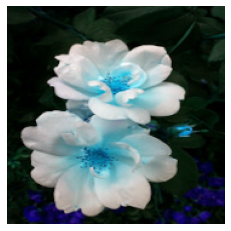

In [62]:
plt.axis('off')
plt.imshow(X[0])

In [63]:
data_augmentation(X)[0]

#gives transformed image in Tensor type

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[ 0,  3,  0],
        [ 0,  4,  0],
        [ 0,  3,  1],
        ...,
        [ 7, 26,  9],
        [ 6, 23, 11],
        [ 5, 25, 13]],

       [[ 0,  5,  0],
        [ 0,  5,  0],
        [ 0,  4,  0],
        ...,
        [14, 32, 15],
        [14, 31, 18],
        [13, 31, 19]],

       [[ 1,  5,  2],
        [ 1,  5,  0],
        [ 1,  5,  0],
        ...,
        [17, 33, 19],
        [18, 34, 20],
        [23, 33, 22]],

       ...,

       [[ 1,  5,  2],
        [ 1,  7,  6],
        [ 3, 14,  6],
        ...,
        [15,  5, 76],
        [15,  4, 76],
        [ 7,  5, 52]],

       [[ 4,  8,  2],
        [ 4,  9,  8],
        [ 3, 12,  8],
        ...,
        [16,  6, 77],
        [16,  3, 82],
        [ 9,  2, 61]],

       [[ 1,  4,  7],
        [ 2,  9,  2],
        [ 7, 18,  7],
        ...,
        [15,  6, 73],
        [14,  3, 77],
        [13,  6, 58]]], dtype=uint8)>

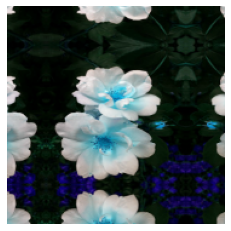

In [64]:
plt.axis('off')

# we need to convert tensor  to array

plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


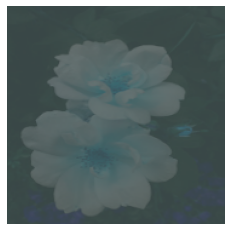

In [65]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
    ])

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

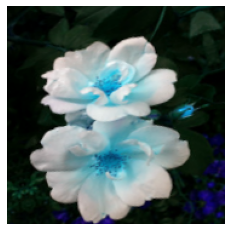

In [66]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.4)
    ])

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [71]:


data_augmentation = keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    ])

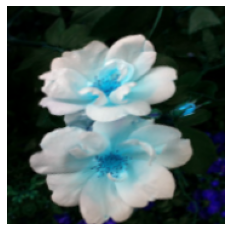

In [72]:

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [74]:
num_classes = 5  

model = Sequential([
    
    #taking 1st layer as augmentation producing new samples
    data_augmentation,
    
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
   
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
   
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    #droput will drop 20% of neurons in each pass and give better generalization 
    layers.Dropout(0.2),
    
   
    layers.Flatten(),
    
    layers.Dense(128,activation="relu"),
    
    
    layers.Dense(num_classes),        
    
])


model.compile(optimizer = 'adam',loss =
tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs= 15)

Epoch 1/15
86/86 [==============================] - 67s 732ms/step - loss: 1.3789 - accuracy: 0.3928
Epoch 2/15
86/86 [==============================] - 56s 649ms/step - loss: 1.0946 - accuracy: 0.5534
Epoch 3/15
86/86 [==============================] - 54s 624ms/step - loss: 0.9769 - accuracy: 0.6097
Epoch 4/15
86/86 [==============================] - 59s 680ms/step - loss: 0.8977 - accuracy: 0.6519
Epoch 5/15
86/86 [==============================] - 58s 679ms/step - loss: 0.8325 - accuracy: 0.6810
Epoch 6/15
86/86 [==============================] - 60s 698ms/step - loss: 0.7981 - accuracy: 0.6991
Epoch 7/15
86/86 [==============================] - 52s 602ms/step - loss: 0.7437 - accuracy: 0.7173
Epoch 8/15
86/86 [==============================] - 49s 568ms/step - loss: 0.7156 - accuracy: 0.7264
Epoch 9/15
86/86 [==============================] - 63s 729ms/step - loss: 0.6811 - accuracy: 0.7424
Epoch 10/15
86/86 [==============================] - 56s 655ms/step - loss: 0.6527 - accura

In [75]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 139ms/step - loss: 0.7833 - accuracy: 0.7004


[0.7832785248756409, 0.7004357576370239]

In [76]:
# test accuracy increased